In [32]:
import pandas as pd
import matplotlib.pyplot as plt

from math import factorial
import numpy as np
import scipy.io
import scipy.signal
import sys

In [33]:
# Power Trace 
df_power_trace = pd.read_csv('d_is_277.CSV')
df_power_trace_clean = df_power_trace[['X', 'CH1']]

df_timing_trace_clean = df_power_trace[['X', 'CH2']]

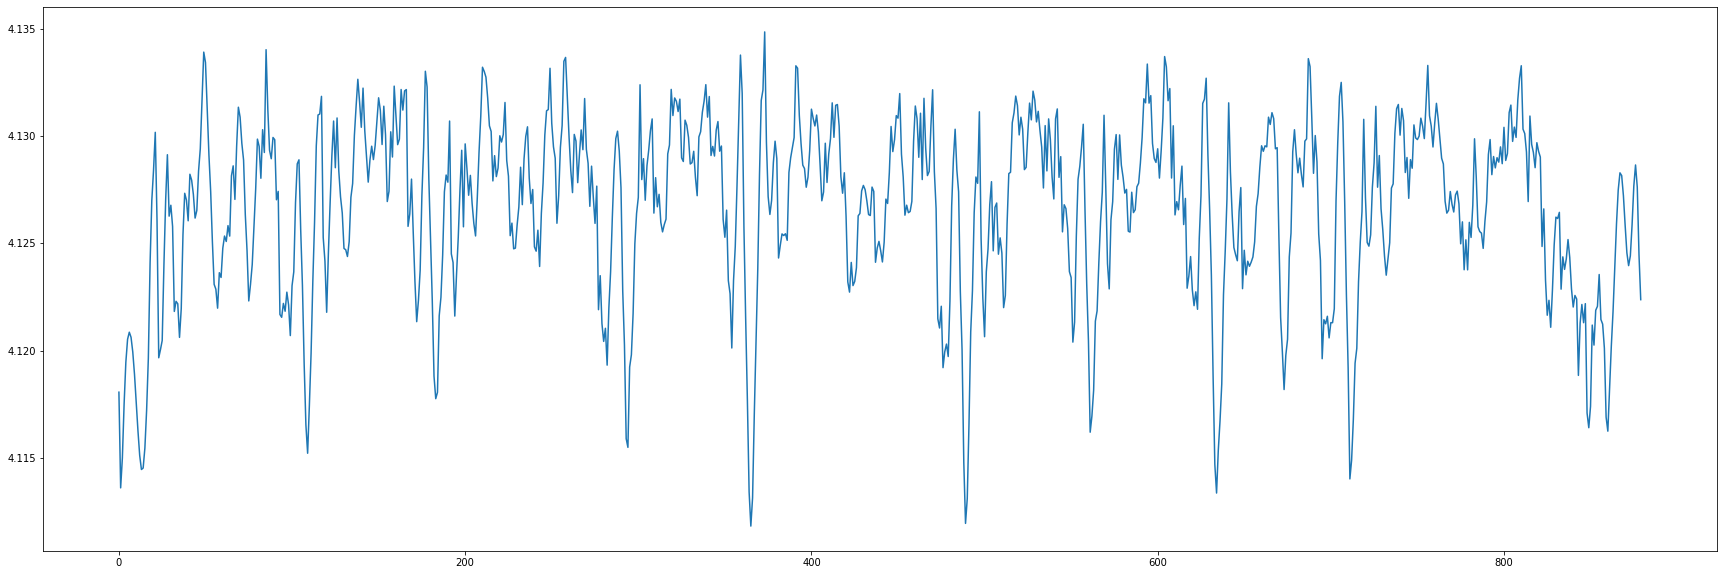

In [34]:
df_power_trace_voltage_filtered = scipy.signal.savgol_filter(df_power_trace_clean['CH1'], 35, 10)
plt.figure(figsize=(30,10))
plt.plot(df_power_trace_voltage_filtered)

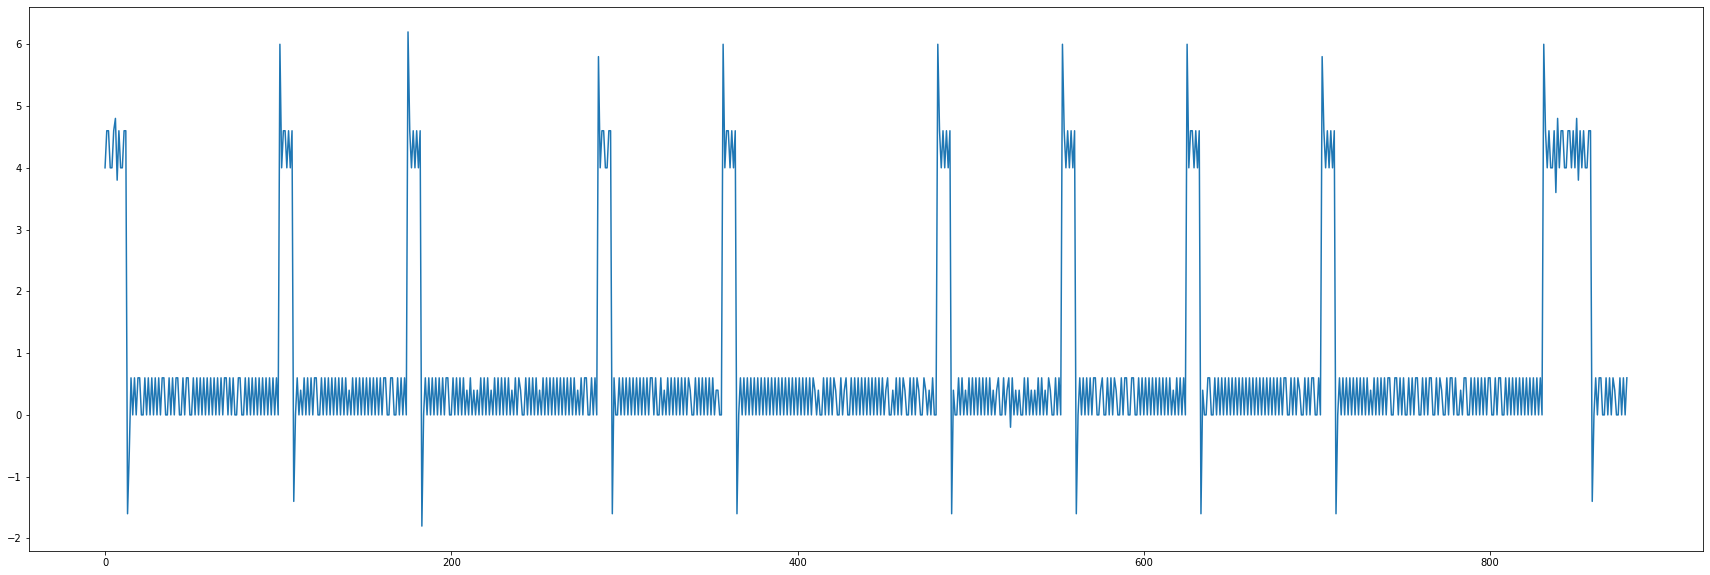

In [35]:
plt.figure(figsize=(30,10))
plt.plot(df_timing_trace_clean['CH2'])

In [36]:
arr = np.array(df_power_trace_voltage_filtered)
arr = np.sort(arr)
arr[0:15]

array([4.11182232, 4.11194781, 4.11310322, 4.11314445, 4.11336164,
       4.11341606, 4.11360297, 4.11401978, 4.11445816, 4.11452814,
       4.11469017, 4.11478994, 4.11489492, 4.11500548, 4.11511705])

In [41]:
# Need to clean up this data set first
# Need to isolate the power trace such that only one cycle is present

minvalue = 4.11182232 + 0.006

signatures = []

limit = 70 #comment this out

first = 0;
start = first;
for i in range(1, len(df_power_trace_voltage_filtered)):
    if df_power_trace_voltage_filtered[i] < minvalue:
        
        #comment this if statement out to see distribution
        #if below limit, likely will be a anomaly point or the segment is not completed yet.
        if i - start < limit:
            continue
        
        signatures.append(df_power_trace_voltage_filtered[start : i])
        start = i


for i in range(len(signatures)):
    print(len(signatures[i]))

108
75
110
70
125
73
72
78
137
